In [1]:
import os
import numpy as np
import pandas as pd
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from tqdm import tqdm
import matplotlib.pyplot as plt

from tess_asteroid_ml import *
from tess_asteroid_ml.make_TESS_asteroid_db import *

In [2]:
type(ffi_date.mean().jd)

NameError: name 'ffi_date' is not defined

Sector 1 Camera 4
['https://archive.stsci.edu/missions/tess/ffi/s0001/2018/221/4-1/tess2018221072942-s0001-4-1-0120-s_ffic.fits', 'https://archive.stsci.edu/missions/tess/ffi/s0001/2018/221/4-2/tess2018221072942-s0001-4-2-0120-s_ffic.fits', 'https://archive.stsci.edu/missions/tess/ffi/s0001/2018/221/4-3/tess2018221072942-s0001-4-3-0120-s_ffic.fits', 'https://archive.stsci.edu/missions/tess/ffi/s0001/2018/221/4-4/tess2018221072942-s0001-4-4-0120-s_ffic.fits']


Set MJD-END to 58339.333754 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58339.333733 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58339.332463 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58339.332485 from DATE-END'. [astropy.wcs.wcs]


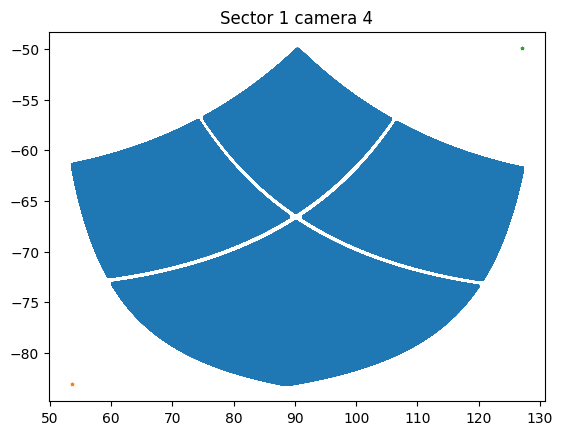

<SkyCoord (ICRS): (ra, dec) in deg
    (53.53922588, -83.1268478)> <SkyCoord (ICRS): (ra, dec) in deg
    (127.13470213, -49.94185588)> 2458339.812920532 30 True
Requesting JPL Smal-bodies API


ReadTimeout: HTTPSConnectionPool(host='ssd.jpl.nasa.gov', port=443): Read timed out. (read timeout=30)

In [3]:
ccd = 0
provider = "mast"

for sector in range(1, 27):
    for camera in range(4, 5):

        print(f"Sector {sector} Camera {camera}")
        # get FFI file path
        ffi_file = get_FFI_name(sector=sector, camera=camera, ccd=ccd, provider=provider)
        print(ffi_file)

        # read FFI to get time, WCS and header
        ffi_header, f2d, col_2d, row_2d, ra_2d, dec_2d = get_data_from_files(
            ffi_file, provider=provider
        )
        ffi_date = Time([ffi_header[0]["DATE-OBS"], ffi_header[0]["DATE-END"]])

        # get asteroid table from JPL SBI for Sector/Camera/CCD
        edge1 = SkyCoord(np.min(ra_2d) * u.deg, 
                 np.min(dec_2d) * u.deg, 
                 frame='icrs')
        edge2 = SkyCoord(np.max(ra_2d) * u.deg, 
                         np.max(dec_2d) * u.deg, 
                         frame='icrs')
        # if sector raps around ra 360/0 edge find the right sector edges
        if np.abs(edge1.ra - edge2.ra) > 180 * u.deg and np.max(np.abs(dec_2d)) < 87:
            ra_2d = np.array(ra_2d)
            edge1 = SkyCoord(np.min(ra_2d[ra_2d >180]) * u.deg, 
                 np.min(dec_2d) * u.deg, 
                 frame='icrs')
            edge2 = SkyCoord(np.max(ra_2d[ra_2d < 180]) * u.deg, 
                             np.max(dec_2d) * u.deg, 
                             frame='icrs')
        plt.scatter(ra_2d, dec_2d, s=1)
        plt.scatter(edge1.ra, edge1.dec, marker="*", s=4)
        plt.scatter(edge2.ra, edge2.dec, marker="*", s=4)
        plt.title(f"Sector {sector} camera {camera}")
        plt.show()
        try:
            jpl_df = get_asteroid_table(
                edge1, 
                edge2, 
                sector=sector, 
                camera=camera, 
                ccd=ccd, 
                # date_obs=ffi_date.mean().jd, 
                date_obs=ffi_date.jd.min(), 
                # date_obs=np.linspace(ffi_date.jd.min(), ffi_date.jd.max(), 5), 
                force=True, 
                elem=True,
            )
        except ValueError:
            print("This sector/camera had empty JPL result. NEED to CHECK...")
            break
            # continue
        print("======" * 10)
        break
    break

In [32]:
type(np.linspace(ffi_date.jd.min(), ffi_date.jd.max(), num=5, endpoint=True)[0])

numpy.float64

In [17]:
type(np.linspace(ffi_date.jd.min(), ffi_date.jd.max(), 5))

numpy.ndarray

In [7]:
jpl_df.loc[13]

Object name                      (2010 FK)
Astrometric RA (hh:mm:ss)      10:29:10.01
Astrometric Dec (dd mm'ss")    +64:31:54.0
Dist. from center RA (")             -7.E4
Dist. from center Dec (")            -3.E4
Dist. from center Norm (")           8.7E4
Visual magnitude (V)                  24.7
RA rate ("/h)                        25.87
Dec rate ("/h)                       33.28
ra                              157.291708
dec                              64.531667
V_mag                                 24.7
name                                      
id                                 2010 FK
Name: 13, dtype: object

# Special case

In [82]:
sector = 24
camera = 4
provider = "mast"


print(f"Sector {sector} Camera {camera}")
# get FFI file path
ffi_file = get_FFI_name(sector=sector, camera=camera, ccd=ccd, provider=provider)
print(ffi_file)

# read FFI to get time, WCS and header
ffi_header, f2d, col_2d, row_2d, ra_2d, dec_2d = get_data_from_files(
    ffi_file, provider=provider
)
ffi_date = Time([ffi_header[0]["DATE-OBS"], ffi_header[0]["DATE-END"]])

ra_2d = np.array(ra_2d)
dec_2d = np.array(dec_2d)

Sector 24 Camera 4
['https://archive.stsci.edu/missions/tess/ffi/s0024/2020/120/4-1/tess2020120235919-s0024-4-1-0180-s_ffic.fits', 'https://archive.stsci.edu/missions/tess/ffi/s0024/2020/120/4-2/tess2020120235919-s0024-4-2-0180-s_ffic.fits', 'https://archive.stsci.edu/missions/tess/ffi/s0024/2020/120/4-3/tess2020120235919-s0024-4-3-0180-s_ffic.fits', 'https://archive.stsci.edu/missions/tess/ffi/s0024/2020/120/4-4/tess2020120235919-s0024-4-4-0180-s_ffic.fits']


Set MJD-END to 58969.017932 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58969.017930 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58969.016846 from DATE-END'. [astropy.wcs.wcs]
Set MJD-END to 58969.016849 from DATE-END'. [astropy.wcs.wcs]


In [83]:
# get asteroid table from JPL SBI for Sector/Camera/CCD
edge1 = SkyCoord(np.min(ra_2d[ra_2d >180]) * u.deg, 
                 np.min(dec_2d) * u.deg, 
                 frame='icrs')
edge2 = SkyCoord(np.max(ra_2d[ra_2d < 180]) * u.deg, 
                 np.max(dec_2d) * u.deg, 
                 frame='icrs')

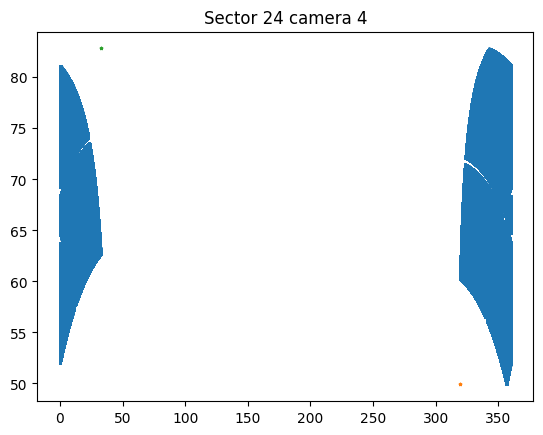

In [84]:
plt.scatter(ra_2d, dec_2d, s=1)
plt.scatter(edge1.ra, edge1.dec, marker="*", s=4)
plt.scatter(edge2.ra, edge2.dec, marker="*", s=4)
plt.title(f"Sector {sector} camera {camera}")
plt.show()

In [85]:
try:
    jpl_df = get_asteroid_table(
        edge1, edge2, sector=sector, camera=camera, ccd=ccd, date_obs=ffi_date.mean().jd, force=True
    )
except ValueError:
    print("This sector/camera had empty JPL result. NEED to CHECK...")

Requesting JPL Smal-bodies API
Saving to /Users/jorgemarpa/Work/BAERI/ADAP/tess-asteroid-ml/data/jpl/jpl_small_bodies_tess_s0024-4-0_catalog.csv
JPL SBI found 158 asteroids with V < 30 in s0024-4-0


In [4]:
from astroquery.jplhorizons import Horizons
from sbident import SBIdent

In [5]:
obstime = ffi_date.jd.mean()
maglim = 30
elem = False

In [8]:
obstime

2458339.823337077

In [9]:
# get state of TESS (-95) from Horizons at our observation time
# and convert it from [AU, AU/day] to [km, km/s]
# location 500 is geocentric, minor planet center.
# 500@-95 means Geocentric location to TESS

# 1AU in km
au = (1 * u.au).to(u.km).value
# TESS state vector
tess = Horizons(id="-95", location="500", epochs=obstime, id_type=None).vectors(
    refplane="earth"
)

ReadTimeout: HTTPSConnectionPool(host='ssd.jpl.nasa.gov', port=443): Read timed out. (read timeout=30)

In [ ]:
tess_km = (
    tess[["x", "y", "z", "vx", "vy", "vz"]].to_pandas().to_numpy() * au
)  # convert to km/d
tess_km[:, 3:] = tess_km[:, 3:] / 86400  # convert to km/s
tess_km = tess_km[0]  # take the first row

# form the xobs dictionary that is the input for SBIdent location argument
xobs = ",".join([np.format_float_scientific(s, precision=5) for s in tess_km])
xobs_location = {"xobs": xobs}

In [44]:
sbid3 = SBIdent(
    location='567',
    obstime=obstime,
    fov=[edge1, edge2],
    maglim=maglim,
    precision="high",
    request=True,
    elem=elem,
)
jpl_sb = sbid3.results.to_pandas()

In [45]:
jpl_sb

,Object name,Absolute magntiude (H),Magnitude slope (G),Eccentricity,Perihelion (au),Time of perihelion passage (JD),Longitude of ascending node (deg),Argument of perihelion (deg),Inclination (deg),Epoch (JD)
0,5477 Holmes (1989 UH2),14.32,0.15,0.075164182,1.7731649,2460314.61624,49.078637,290.47879,22.550336,2460400.5
1,85235 (1993 JA),17.12,0.15,0.183257000,1.6024458,2460247.18580,43.975816,223.73953,30.102684,2460400.5
2,85987 (1999 JT5),15.65,0.15,0.066748053,1.7836067,2460319.37160,48.417082,297.09140,23.516472,2460400.5
3,88959 (2001 TZ44),17.45,0.15,0.563581668,0.75224184,2460558.96536,38.955726,114.92279,53.835897,2460400.5
4,98117 (2000 SP2),15.29,0.15,0.303495005,1.6485747,2460941.18380,63.783759,225.60240,27.242681,2460400.5
...,...,...,...,...,...,...,...,...,...,...
236,C/2020 A2 (Iwamoto),n.a.,,0.999077705,0.97801189,2458856.82064,286.37941,68.209203,120.75013,2458902.5
237,C/2020 H3 (Wierzchos),n.a.,,1.00221882,2.3043884,2459004.06648,270.56935,29.607609,62.368384,2459011.5
238,C/2020 H6 (ATLAS),n.a.,,1.00057018,4.7028697,2459488.55219,213.70830,20.344599,79.970782,2459586.5
239,C/2020 O2 (Amaral),n.a.,,1.00232543,4.8622544,2459455.11490,256.75725,10.309432,71.750811,2459637.5
